In [229]:
library(tidyverse)

### Empirical Distribution of a Statistic

* The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

* The empirical histogram of a large random sample is likely to resemble the histogram of the population.

* Given a large fish tank that contains 580 Mozambique tilapia fish
 * Suppose that we know, somehow, the weight of all the fishes in the tank
  * Population is the total of all fishes in the tank
  * Random variable $X \sim \mathcal{N}(630.26, 75.89)$.


In [230]:
weights = read.csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights)

,fish_index,data
,<int>,<dbl>
1,1,574.2974
2,2,728.5173
3,3,517.1673
4,4,561.2709
5,5,565.4517
6,6,696.6255


In [231]:
weights_tbl = read_csv("data/tank_5_oreochromis_mossambicus.csv")
head(weights_tbl)

Parsed with column specification:
cols(
  fish_index = col_double(),
  data = col_double()
)



fish_index,data
<dbl>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


In [232]:
weights_tbl <- read_csv("data/tank_5_oreochromis_mossambicus.csv",
                      col_types = cols(
                        fish_index = col_integer(),
                        data = col_double()
                      ))
head(weights_tbl)

fish_index,data
<int>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


In [233]:
names(weights_tbl) = c("index", "weights")
head(weights_tbl)

index,weights
<int>,<dbl>
1,574.2974
2,728.5173
3,517.1673
4,561.2709
5,565.4517
6,696.6255


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = data. 
Did you mistype the name of a data column or forget to add after_stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr

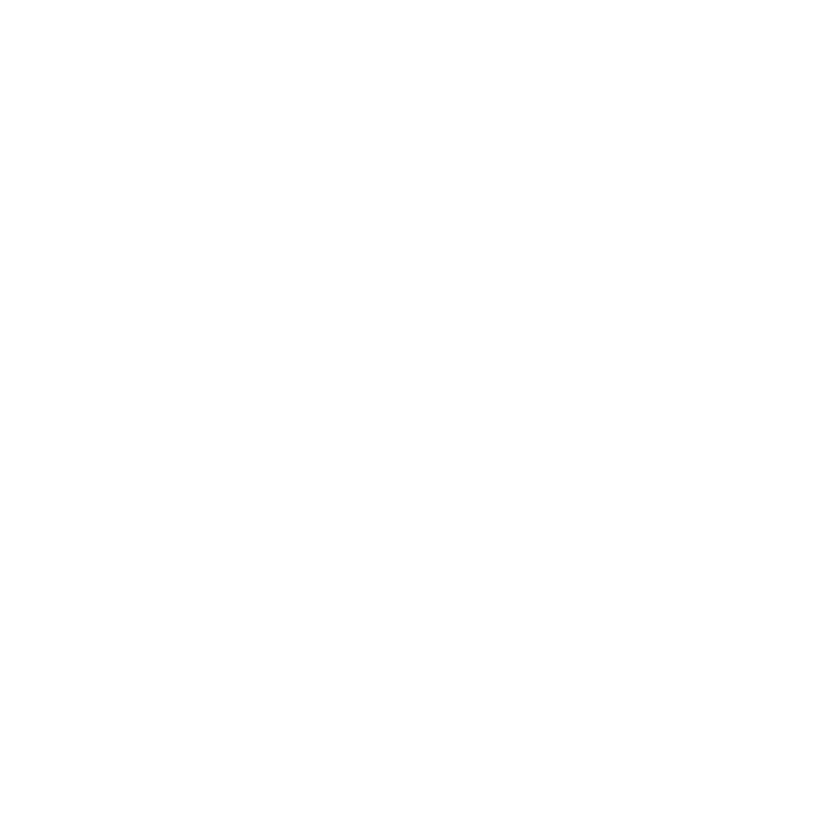

In [234]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=data), bins = 25, alpha=0.5, color="black", size=1)


### Working with Kernel Density Estimates


*  Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. 
  * A fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

* We much prefer to visualize data using KDEs instead of histograms for several reasons, which we will discuss later 
  * `geom_density` estiames the density using the KDE approach.
  * Param `bw` of  `geom_density` is tricky to estimate, but for now, we will just use the values that provides the smoothest KDE with the lowest variance.


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = data. 
Did you mistype the name of a data column or forget to add after_stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr

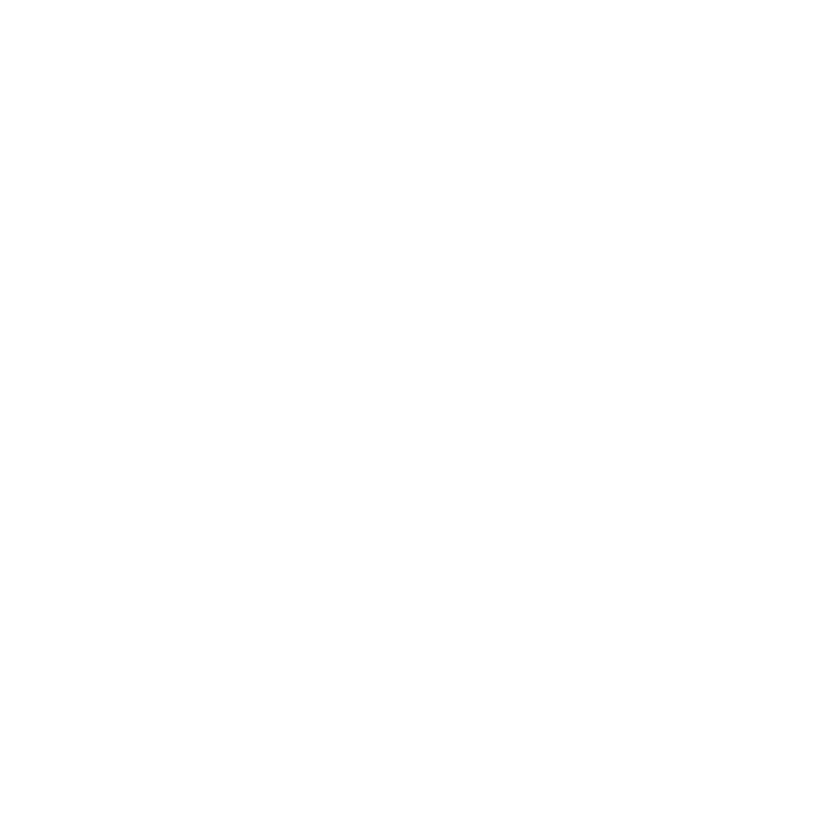

In [235]:
ggplot(data=weights_tbl) + 
  geom_density(aes(x=data), color="black", size=1, bw=30)



ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = data. 
Did you mistype the name of a data column or forget to add after_stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr),

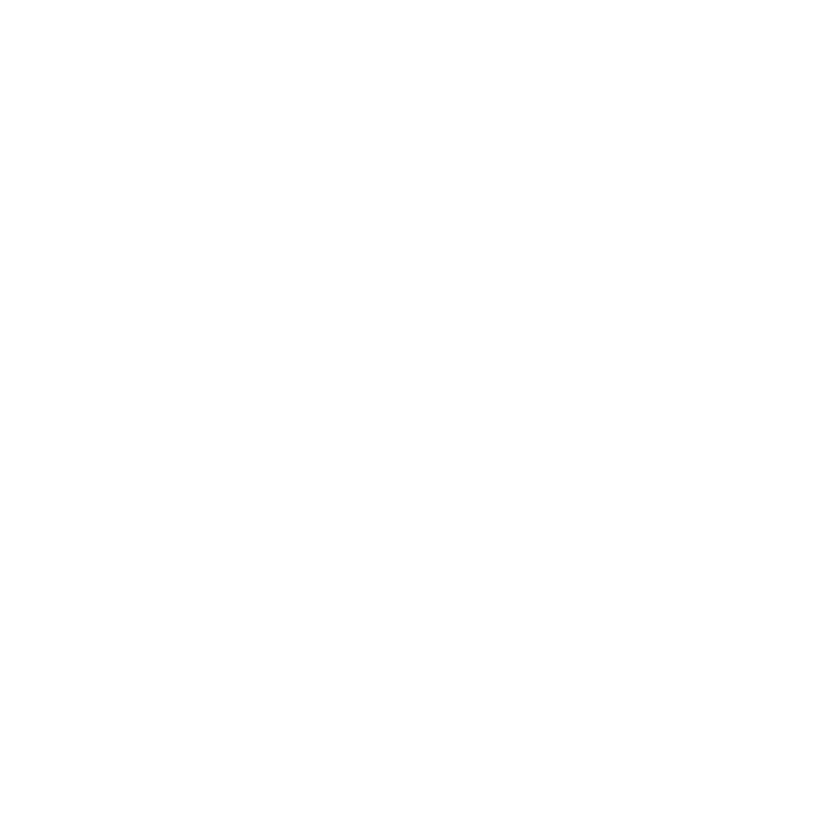

In [236]:
ggplot(data=weights_tbl) + 
  geom_histogram(aes(x=data, y=..density..), bins = 25, alpha=0.5, color="black", size=1) +
  geom_density(aes(x=data), color="black", size=1, bw=25) +  
  scale_x_continuous(limits=c(300,1200), oob = scales::oob_keep)
  
# The oob = scales::oob_keep was added to fix an obscure warning
# the solution was proposed here
# https://github.com/tidyverse/ggplot2/issues/4083

### Parameters of a Distribution

* Recall that a distribution's parameters define what the distribution looks like
  * They are the numerical quantities that define a population

* Knowing the parameters can help:
  * Compute probability of certain events
  * Compute expectatin
  * Understand the variance in the observations

* For the fish data, we can easily compute the pipulation parameters.
 * Typically we distinguish sample mean $\bar{X}$ from population mean $\mu$
   * we typically compute $\bar{X}$ based on a small sample of the data as a proxy for $\mu$
 * Here, we have access to the whole population, so we can compute the population mean

In [237]:
mean(weights_tbl$weights)
sd(weights_tbl$weights)

[1] 630.2647

[1] 75.8954

### Statistics 

- Statistics (field) deals to a large part with the estimation of unknown parameters. 

- A **statistic** (singular!) is any number computed using the data in a sample. 

* parameters estimated from the data are, therefore, statistics

* statistics are subject to sample bias.

* We know that samples are likely to resemble the populations they are drawn from
  * This is the whole promise in stats

* what would the sample mean look like if we randomly sampled from the population of all fish?


In [238]:
set.seed(32)
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

[1] 610.2921

In [100]:
random_sample = sample(weights_tbl$weights, 50)
mean(random_sample)

[1] 631.6999

### Statistics - cont'd

* Each of the samples above ( 50 fish) resulted in one observed value of the statistic. 
  * These values are "somewhat" close to the real population mean (630.26)
* Naturally, selecting different samples will very unlikely yield the same statistic.
  * How does the statistic vary based on the selected samples


* We can answer by computing the statistic many times on randomly selected samples and noting the values

  * A histogram of those values will tell us about the distribution of the statistic.


In [279]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50))

598.0020,744.9034
662.6704,495.3900
583.6637,805.1605
564.9833,715.9165
718.8262,771.6589
632.3607,573.4104
536.7313,555.5932
686.7843,614.0971
750.1126,655.4498
656.1885,576.4268
599.5717,622.9322


In [127]:
n = 2

n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(  1, mean)


[1] 621.3691 635.1797

In [280]:
set.seed(42)
n = 1000

samples_means = n %>%
  replicate(sample(weights_tbl$weights, 50)) %>%
  t() %>%
  apply(  1, mean)

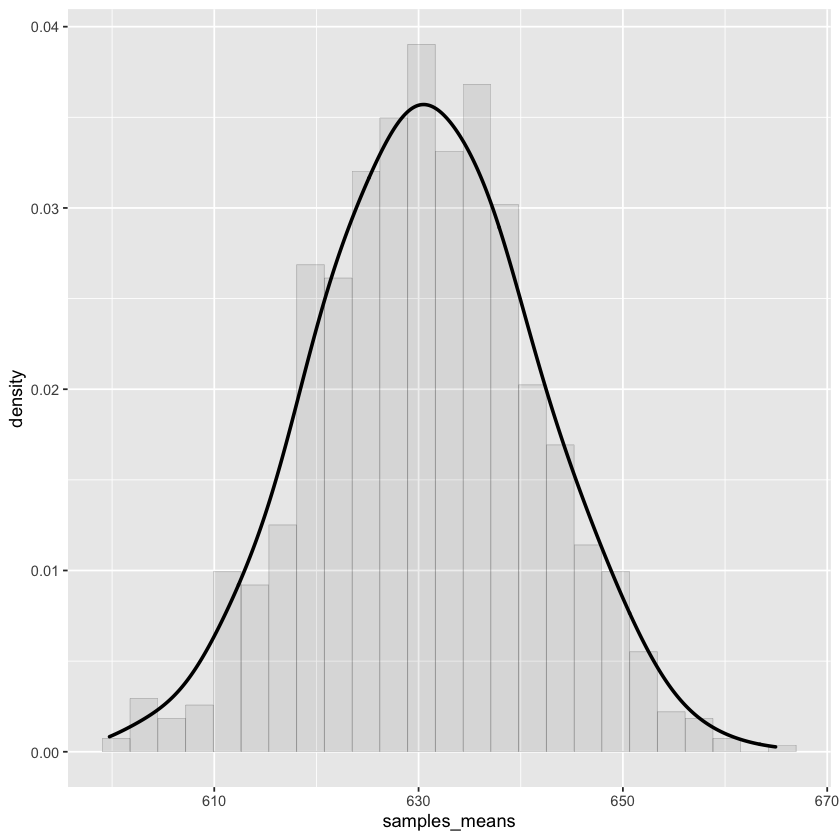

In [281]:
ggplot() + 
  geom_histogram(aes(x=samples_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=samples_means), color="black", size=1, bw=3.5)


In [154]:
mean(samples_means)

[1] 630.6604

### Assessing Statistics

Example: 

* You use a DNA Methylation kit that is advertised to have a probability of success of 0.26 on ivertebratess

* You repeat the experiment 100 times and you only succeed 10 times (0.10)

* You argue with the vendor that the kit is faulty and need another one.


### A Model 

- A model stipulates that the probability of success is 0.26

- The manufacturer explain that they only provide probabilistic guarantees

   - I.e., if you were to repeat this a large number of times, you would arrive at the value 0.26
      - Repeat this means trying 100 kits multiple times (say 500 times 100 kits)

- We are in a good position to assess this model

- Why type of probability distribution best models this example

  - Discrete or continuous?

- How can we simulate the experiment?
    
    - What are we trying to estimate? 

In [284]:
x =c(TRUE, TRUE, FALSE)
sum(x)

[1] 2

In [287]:
sum(successes <= 10 )

[1] 0

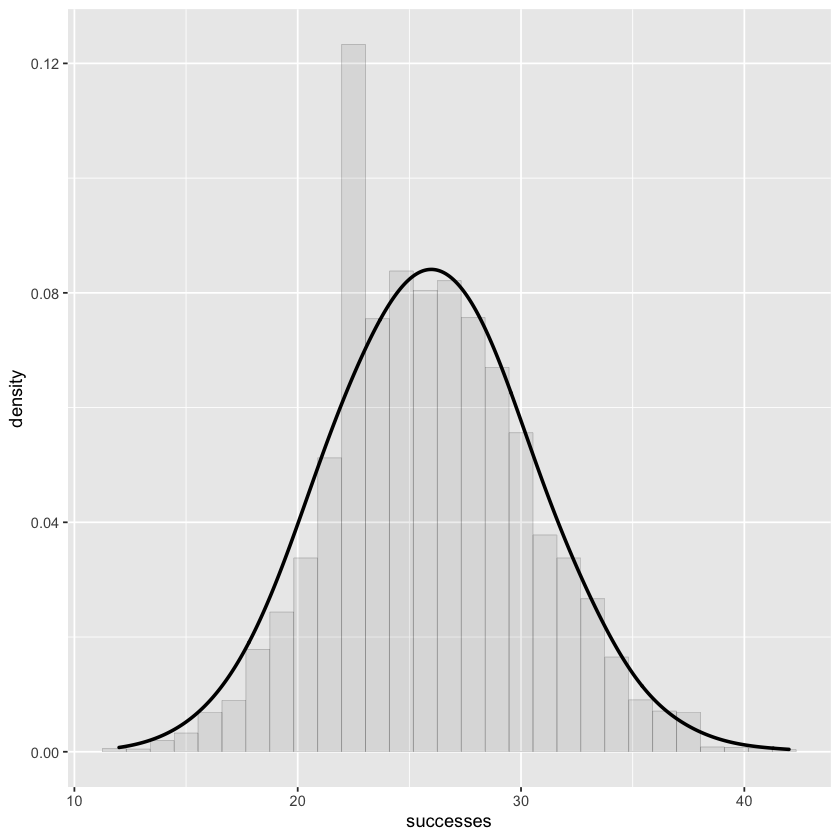

In [286]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=successes, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=successes), color="black", size=1, bw=1.6)



### The Statistic

* The manufacturer says p=0.26 represents the population.

* A natural statistic, number of successes in our simulated sample of 100 tests.

  * Small value with favor alternative viewpoint.


* If the model were true, what is the distribution of success? 



In [166]:
rbinom(10, 100, 0.26)

[1] 27 28 23 27 30 31 26 21 24 29

In [171]:

n = 2

n %>%
  replicate(rbinom(10, 100, 0.26)) %>%
  t()


22,26,17,27,23,38,34,29,25,25
26,28,27,31,40,27,24,27,23,28


In [192]:
# To get a sense of the variability, let's generate 10,000 simulated values of the count. 
nb_replicates = 10000
nb_kits = 100

nb_success = rbinom(nb_replicates, nb_kits, 0.26)

In [194]:
nb_success

[1] 28 33 21 27 23 24 29 32 27 30 34 25 30 23 15 23 29 37 28 29 25 29 22 26
   [25] 29 22 26 30 30 34 18 21 30 24 24 31 26 30 40 26 28 20 25 21 35 29 24 31
   [49] 28 27 23 28 23 30 27 29 21 30 22 23 26 30 18 21 28 27 18 25 31 21 28 25
   [73] 29 30 25 34 30 22 28 28 30 29 30 31 32 27 29 29 27 24 22 30 27 29 32 17
   [97] 20 31 18 28 30 28 25 32 20 29 25 29 30 26 29 28 32 26 30 33 18 23 25 30
  [121] 28 21 21 27 22 24 24 24 27 26 22 29 23 30 23 26 30 26 30 24 24 26 27 25
  [145] 32 23 25 20 17 29 21 38 25 18 24 26 20 30 28 18 21 32 31 25 21 27 28 25
  [169] 24 25 28 24 28 25 25 33 31 24 29 23 24 29 22 25 27 26 28 28 21 28 34 28
  [193] 20 27 27 21 29 29 28 30 22 24 25 23 26 13 20 21 20 28 23 29 26 20 16 18
  [217] 29 31 20 33 29 29 26 29 31 33 24 25 26 28 24 31 26 24 39 24 22 34 28 23
  [241] 18 20 26 14 25 22 19 38 32 23 25 29 25 17 23 23 26 28 32 29 32 17 24 25
  [265] 23 28 26 32 26 26 21 26 30 30 31 24 26 26 25 32 33 30 23 33 21 21 25 26
  [289] 29 24 23 30 26 25 25 28 23 25 23 23 26 29 24 20 23 34 27 23 24 25 21 24
  [313] 22 23 31 29 19 22 26 31 24 23 24 24 27 23 27 24 31 34 23 24 30 30 25 20
  [337] 24 18 32 29 23 26 28 31 28 26 26 32 26 27 30 25 32 29 29 29 28 33 24 18
  [361] 22 25 27 25 28 34 29 28 26 21 26 22 26 33 24 25 27 18 23 31 13 31 28 27
  [385] 30 22 25 29 22 34 27 29 24 28 28 30 27 25 20 34 30 22 21 25 23 27 23 28
  [409] 21 21 19 24 21 23 24 27 24 27 27 28 26 21 29 26 33 26 29 31 28 22 32 29
  [433] 23 27 32 29 26 25 30 23 27 23 22 19 24 19 26 24 24 29 24 31 25 29 19 26
  [457] 25 23 33 30 25 16 29 19 21 25 19 21 29 25 26 23 19 36 21 26 29 18 28 26
  [481] 15 22 22 34 21 27 20 27 28 23 31 25 22 22 30 31 26 29 28 29 25 31 18 29
  [505] 31 22 30 24 21 25 22 26 27 26 18 24 28 33 22 33 26 25 23 28 23 22 29 25
  [529] 28 26 17 24 27 33 23 21 20 23 23 30 27 25 28 29 26 29 29 33 28 19 23 23
  [553] 25 25 31 27 18 22 29 28 27 31 27 24 26 29 26 25 30 27 27 20 20 25 32 17
  [577] 32 34 30 25 24 24 26 29 29 25 27 20 26 28 25 27 20 23 28 23 35 33 26 29
  [601] 19 23 24 24 29 32 27 26 26 20 24 28 19 34 26 22 29 25 25 23 23 22 18 28
  [625] 26 27 16 25 23 17 22 20 20 30 35 27 32 24 23 23 15 22 27 23 24 28 27 30
  [649] 23 44 25 30 34 30 27 27 24 25 25 23 27 21 27 24 25 22 30 25 22 31 30 30
  [673] 22 24 32 28 25 22 22 27 21 28 30 23 25 23 24 31 22 33 29 30 22 27 18 26
  [697] 26 17 24 26 21 28 25 31 23 35 23 25 20 18 33 23 28 28 29 23 25 22 28 28
  [721] 21 25 26 23 30 30 28 17 27 27 23 23 22 26 19 19 19 24 33 22 22 28 30 20
  [745] 29 26 23 35 29 20 30 28 30 28 26 24 19 26 33 24 24 21 28 32 27 23 31 28
  [769] 21 28 21 20 24 23 28 24 32 25 21 24 16 27 28 17 30 30 26 26 27 24 27 21
  [793] 35 21 33 28 20 20 24 23 25 28 28 23 31 16 23 24 29 32 29 23 26 29 29 24
  [817] 19 27 20 19 20 30 23 21 29 25 24 26 34 21 20 23 31 24 26 30 28 32 26 26
  [841] 22 24 34 18 26 26 36 19 23 27 29 23 21 29 28 27 15 27 25 21 24 25 19 29
  [865] 31 21 27 29 25 23 25 26 26 29 22 28 26 31 28 31 16 24 18 21 25 28 31 27
  [889] 20 25 20 29 28 31 27 31 27 15 33 29 29 33 26 33 31 26 30 23 31 28 28 29
  [913] 27 28 22 30 33 20 23 15 27 24 28 39 26 22 30 30 20 18 15 23 32 28 26 22
  [937] 32 20 28 20 24 21 22 23 23 26 20 25 28 26 29 21 24 29 31 22 35 19 26 20
  [961] 31 18 29 19 27 24 24 24 25 30 22 20 26 29 32 31 38 25 31 31 25 20 26 23
  [985] 22 25 20 33 25 30 22 25 20 31 31 26 22 23 31 30 29 31 26 31 23 22 23 26
 [1009] 27 21 26 25 27 27 25 20 25 31 16 21 28 22 23 28 18 22 24 26 29 34 30 27
 [1033] 35 28 24 30 27 17 32 21 28 32 33 21 26 28 26 25 29 38 29 22 18 27 32 35
 [1057] 29 30 17 24 30 27 25 30 27 22 25 23 26 24 28 13 26 26 19 25 40 23 31 31
 [1081] 26 27 34 31 28 30 34 31 30 25 29 20 17 33 31 29 25 25 28 30 28 21 26 25
 [1105] 20 27 21 25 33 29 23 30 22 31 24 30 32 17 27 32 33 26 30 25 28 23 22 25
 [1129] 24 28 24 25 24 35 21 28 29 27 30 23 20 27 19 16 26 21 30 28 23 28 23 36
 [1153] 24 21 29 26 23 24 25 28 29 19 32 21 30 29 28 31 25 22 31 23 24 20 32 28
 [1177] 25 17 25 29 30 33 26 30 23 31 24 22 27 25 17 24 32 18 17 26 23 22 24 21
 [12

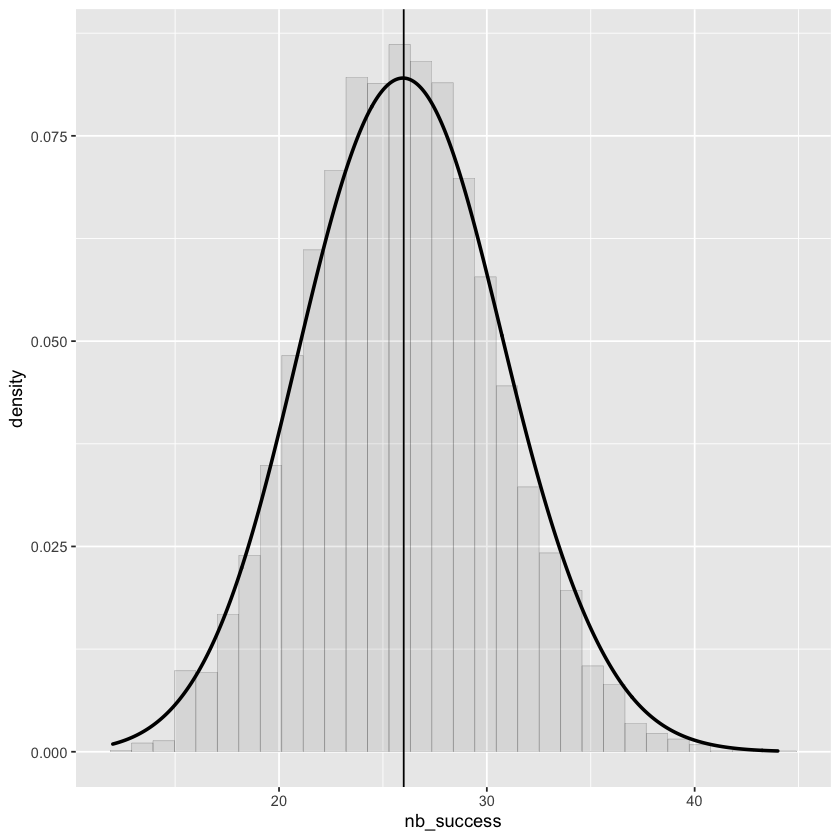

In [223]:


ggplot() + 
  geom_histogram(aes(x=nb_success, y=..density..), bins = 32, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=nb_success), color="black", size=1, bw=2) + 
  geom_vline(aes(xintercept=26))

In [226]:
sum(nb_success < 10)

[1] 0

### Comparing the Prediction and the Observed Data

- The value 10 is far out. 
  - Very few of them came out to be 10 or less. 

- Assuming the claim is true, if we use the kit 100 times, the probability of observing 10 successes is ~0 

- This is evidence that the model (claim) is not consistent with the data we obtained

  - When the data and a model are inconsistent, the model is hard to justify. 


- While it is *possible* to have 10 successes, simulation shows that it's very unlikely. 
  * the probability if such an event is actually null


### General Approach

* This method of assessing models is very general. 
1. We have a value we wish to compare to some distribution
2. We generate samples under the hypothesis we would like to test
  * This is called the null hypothesis

3. we reason about the observed data or statistic


* Here is an example in which we use it to assess a model in a completely different setting.

### Mendel's Pea Flowers ###

* In a particular variety, each pea plant has either purple or white flowers.

* The color in each plant are independent.

* Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

* The null model: For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

* We sampled 100 flower and 72 were actually purple

* Do our results agree with Mendel's model?


### Approach to Assessment

* Assess the model by simulating plants under the assumptions of the model 

* Compare the results to the data that Mendel recorded.


* If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. 

* If the model is not good, the percent purple-flowering will be away from 75%. 

* It may be higher, or lower; the direction doesn't matter.

* The *distance* between 75% and the percent of purple-flowering plants in the sample is critical. 

 * Big distances are evidence that the model isn't good.

* Therefore, a good statistic is the distance between the sample percent and 75%

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$


### Predicting the Statistic Under the Model ###

* How big the distance would be if Mendel's model were true?

  * Use `sample_proportions` to simulate the distance under the assumptions of the model.

* Mendel had 929 plants of the variety corresponding to this model.

* One simulated value of the experiment would look like


In [245]:
rbinom(1, 929, 0.75)/929

[1] 0.7416577

In [250]:
# We could simulate in a batch of 929
# abs(np.random.binomial(100, 0.75) - 75)

# or in a batch of 929, as Mendel did
abs((100 * rbinom(1,929, 0.75)/929) - 75)

[1] 1.480086

### Running the Simulation
* To get a sense of how variable the distance could be, we have to simulate it many more times.
  * We will generate 10,000 values of the distance.
* We will plot the histogram of the simulated values to see the distribution of the distance as predicted by the model.


In [258]:

(100 * rbinom(10, 929, 0.75)/929) - 75


[1] -0.6189451  0.4574812 -1.3724435  1.4262648 -1.3724435  0.7804090
 [7]  0.9956943  1.2109795  1.6415501  0.4574812

In [267]:
distances = abs((100 * rbinom(10000, 929, 0.75)/929) - 75)
distances[0:10]

[1] 1.26480086 0.61894510 2.01829925 0.40365985 1.21097955 0.18837460
 [7] 0.08073197 1.64155005 0.24219591 0.29601722

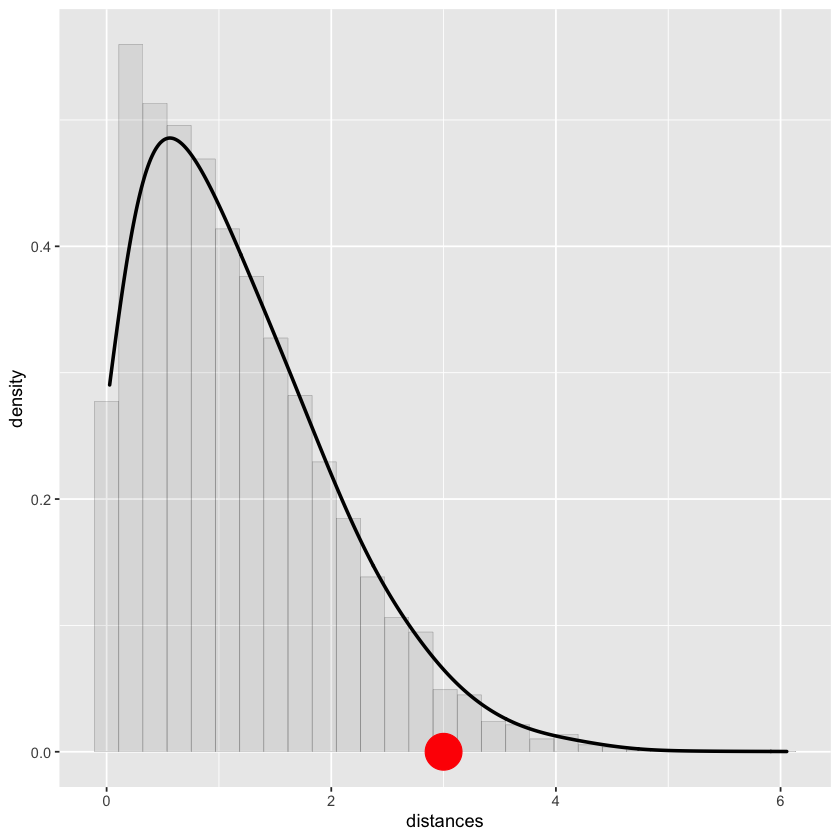

In [288]:
set.seed(42)
successes = rbinom(10000, 100, 0.26)

ggplot() + 
  geom_histogram(aes(x=distances, y=..density..), bins = 29, alpha=0.1, color="black", size=0.05) +
  geom_density(aes(x=distances), color="black", size=1, bw=0.3) + 
  geom_point(aes(x=3, y=0), size=10, color="red")


In [292]:
sum(distances >=3)/10000

[1] 0.0331